In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from tensorflow import keras
import tensorflow as tf
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

over_sampler = RandomOverSampler()
ada = ADASYN()
SMOTE = SMOTE()
scaler = StandardScaler()
normalizer = Normalizer()
robust = RobustScaler()
minmax = MinMaxScaler()

X_train = pd.read_csv('/Users/harock96/Documents/2021년 1학기/인공지능/프로젝트/데이터 전처리/X_train.csv')
Y_train = pd.read_csv('/Users/harock96/Documents/2021년 1학기/인공지능/프로젝트/데이터 전처리/Y_train.csv')
X_test = pd.read_csv('/Users/harock96/Documents/2021년 1학기/인공지능/프로젝트/데이터 전처리/X_test.csv')
Y_test = pd.read_csv('/Users/harock96/Documents/2021년 1학기/인공지능/프로젝트/데이터 전처리/Y_test.csv')

# data number 삭제

X_train = X_train.iloc[:, 1:]
Y_train = Y_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]
Y_test = Y_test.iloc[:, 1:]

# 오버샘플링

X_train_ros, Y_train_ros = over_sampler.fit_resample(X_train, Y_train)
X_train_ada, Y_train_ada = ada.fit_resample(X_train, Y_train)
X_train_smt, Y_train_smt = SMOTE.fit_resample(X_train, Y_train)
X_test_ros, Y_test_ros = over_sampler.fit_resample(X_test, Y_test)
X_test_ada, Y_test_ada = ada.fit_resample(X_test, Y_test)
X_test_smt, Y_test_smt = SMOTE.fit_resample(X_test, Y_test)


# shuffle

s1 = np.arange(X_train_ros.shape[0])
np.random.shuffle(s1)
X_train_ros = X_train_ros.iloc[s1]
Y_train_ros = Y_train_ros.iloc[s1]

s2 = np.arange(X_train_ada.shape[0])
np.random.shuffle(s2)
X_train_ada = X_train_ada.iloc[s2]
Y_train_ada = Y_train_ada.iloc[s2]

s3 = np.arange(X_train_smt.shape[0])
np.random.shuffle(s3)
X_train_smt = X_train_smt.iloc[s3]
Y_train_smt = Y_train_smt.iloc[s3]

s4 = np.arange(X_test.shape[0])
np.random.shuffle(s4)
X_test = X_test.iloc[s4]
Y_test = Y_test.iloc[s4]

s5 = np.arange(X_test_smt.shape[0])
np.random.shuffle(s5)
X_test_smt = X_test_smt.iloc[s5]
Y_test_smt = Y_test_smt.iloc[s5]

s6 = np.arange(X_test_ros.shape[0])
np.random.shuffle(s6)
X_test_ros = X_test_ros.iloc[s6]
Y_test_ros = Y_test_ros.iloc[s6]

s7 = np.arange(X_test_ada.shape[0])
np.random.shuffle(s7)
X_test_ada = X_test_ada.iloc[s7]
Y_test_ada = Y_test_ada.iloc[s7]

# numpy 배열로 변환

X_test = X_test.values
Y_test = Y_test.values
X_train_smt = X_train_smt.values
Y_train_smt = Y_train_smt.values
X_train_ada = X_train_ada.values
Y_train_ada = Y_train_ada.values
X_train_ros = X_train_ros.values
Y_train_ros = Y_train_ros.values
X_test_smt = X_test_smt.values
Y_test_smt = Y_test_smt.values
X_test_ada = X_test_ada.values
Y_test_ada = Y_test_ada.values
X_test_ros = X_test_ros.values
Y_test_ros = Y_test_ros.values

# normalizer

X_train_ros = normalizer.fit_transform(X_train_ros)
X_train_ada = normalizer.fit_transform(X_train_ada)
X_train_smt = normalizer.fit_transform(X_train_smt)
X_test_ros = normalizer.transform(X_test_ros)
X_test_ada = normalizer.transform(X_test_ada)
X_test_smt = normalizer.transform(X_test_smt)
X_test = normalizer.transform(X_test)

# minmax

#X_train_ros = minmax.fit_transform(X_train_ros)
#X_train_ada = minmax.fit_transform(X_train_ada)
#X_train_smt = minmax.fit_transform(X_train_smt)
#X_test_ros = minmax.transform(X_test_ros)
#X_test_ada = minmax.transform(X_test_ada)
#X_test_smt = minmax.transform(X_test_smt)
#X_test = minmax.transform(X_test)

# robustscaler

#X_train_ros = robust.fit_transform(X_train_ros)
#X_train_ada = robust.fit_transform(X_train_ada)
#X_train_smt = robust.fit_transform(X_train_smt)
#X_test_ros = robust.transform(X_test_ros)
#X_test_ada = robust.transform(X_test_ada)
#X_test_smt = robust.transform(X_test_smt)
#X_test = robust.transform(X_test)

# Standardscaler

#X_train_ros = scaler.fit_transform(X_train_ros)
#X_train_ada = scaler.fit_transform(X_train_ada)
#X_train_smt = scaler.fit_transform(X_train_smt)
#X_test_ros = scaler.transform(X_test_ros)
#X_test_ada = scaler.transform(X_test_ada)
#X_test_smt = scaler.transform(X_test_smt)
#X_test = scaler.transform(X_test)

In [38]:
print(list(Y_test).count(0))

68253


In [16]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [17]:
# model 구현
model = keras.Sequential()
model.add(keras.layers.Dense(10,activation = 'relu', input_shape = (30,)))
#model.add(keras.layers.Dense(45,activation = 'relu'))
#model.add(keras.layers.Dense(45,activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

# 'rmsprop'는 optimizer default값
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy', recall_m, precision_m, f1_m])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# node = 45, layer = 1, resampling = smt # scaling = normalizer
history = model.fit(X_train_smt, Y_train_smt, epochs = 5, verbose = 1, validation_data = (X_test_smt, Y_test_smt))

Epoch 1/5


In [59]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall_m', 'precision_m', 'f1_m', 'val_loss', 'val_accuracy', 'val_recall_m', 'val_precision_m', 'val_f1_m'])


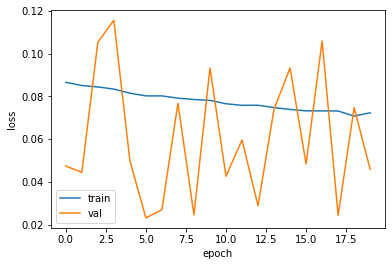

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

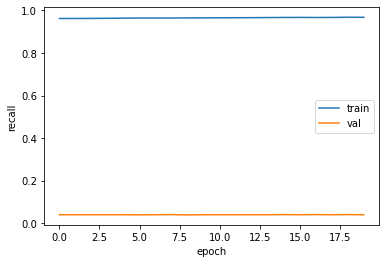

In [61]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.xlabel('epoch')
plt.ylabel('recall')
plt.legend(['train', 'val'])
plt.show()

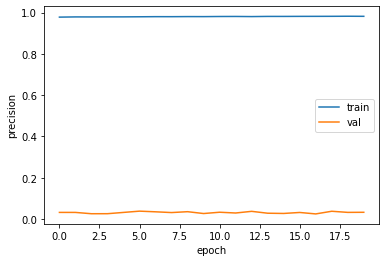

In [62]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.xlabel('epoch')
plt.ylabel('precision')
plt.legend(['train', 'val'])
plt.show()

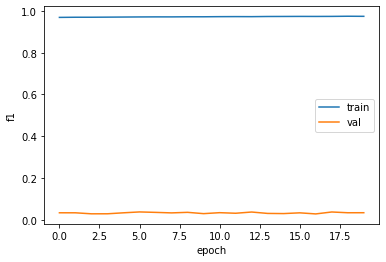

In [63]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.xlabel('epoch')
plt.ylabel('f1')
plt.legend(['train', 'val'])
plt.show()